In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d die9origephit/children-vs-adults-images

 65% 18.0M/27.7M [00:00<00:00, 71.5MB/s]
100% 27.7M/27.7M [00:00<00:00, 82.8MB/s]


In [3]:
import zipfile
zip_ref= zipfile.ZipFile('/content/children-vs-adults-images.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [22]:
!pip install split-folders

In [32]:
import splitfolders
import tensorflow as tf
from tensorflow import keras
from keras.models import Model,Sequential
from keras.layers import Input,Conv2D,GlobalAveragePooling2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam,SGD,RMSprop
from keras.metrics import BinaryAccuracy
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [5]:
# Generators

train_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size= (256,256)
)

validation_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size= (256,256)
)

Found 680 files belonging to 2 classes.
Found 120 files belonging to 2 classes.


In [6]:
# Normalization

def process(image, label):
  image= tf.cast(image/255., tf.float32)
  return image, label

train_ds= train_ds.map(process)
validation_ds= validation_ds.map(process)

In [7]:
import os

# Assuming your dataset directory structure is organized such that each subdirectory represents a class
class_names = sorted(os.listdir(r"/content/train"))
class_indices = {class_name: i for i, class_name in enumerate(class_names)}

# Now you can access class indices using class_names or predicted_classes
print(class_indices)

{'adults': 0, 'children': 1}


In [8]:
# Creating our CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [16]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=validation_ds,
    verbose = 1
)

Epoch 1/10
22/22 [==============================] - 3s 103ms/step - loss: 1.3747 - accuracy: 0.7956 - val_loss: 5.0776 - val_accuracy: 0.5417
Epoch 2/10
22/22 [==============================] - 4s 131ms/step - loss: 1.0022 - accuracy: 0.8191 - val_loss: 5.7476 - val_accuracy: 0.5667
Epoch 3/10
22/22 [==============================] - 5s 156ms/step - loss: 0.7145 - accuracy: 0.8676 - val_loss: 7.2476 - val_accuracy: 0.5250
Epoch 4/10
22/22 [==============================] - 4s 138ms/step - loss: 0.6612 - accuracy: 0.8574 - val_loss: 4.1466 - val_accuracy: 0.5667
Epoch 5/10
22/22 [==============================] - 4s 132ms/step - loss: 0.5145 - accuracy: 0.8721 - val_loss: 9.3808 - val_accuracy: 0.5500
Epoch 6/10
22/22 [==============================] - 5s 191ms/step - loss: 0.5140 - accuracy: 0.8985 - val_loss: 6.7152 - val_accuracy: 0.5500
Epoch 7/10
22/22 [==============================] - 3s 103ms/step - loss: 0.4409 - accuracy: 0.9088 - val_loss: 8.7624 - val_accuracy: 0.5333
Epoch 

### Accuracy is around

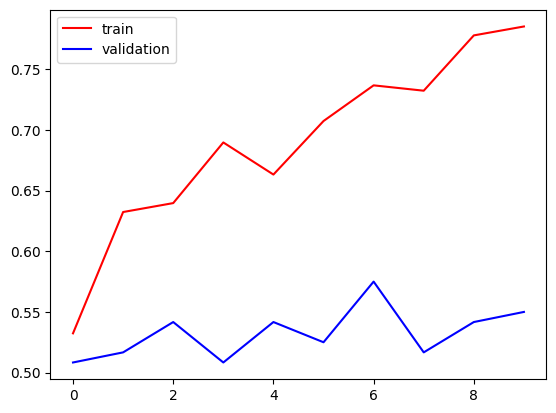

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

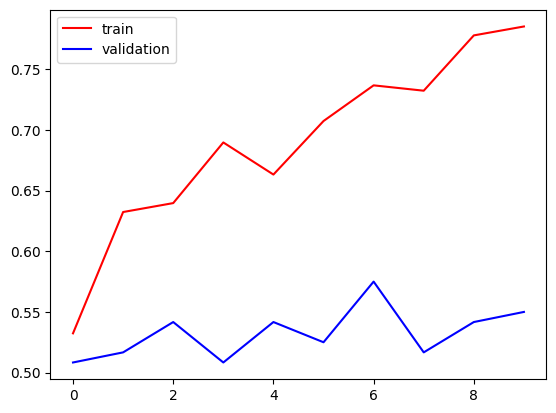

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
!pip install pillow
!pip install opencv-python
import cv2
import numpy as np

Path of the image to be predicted: /content/train/children/113.jpg


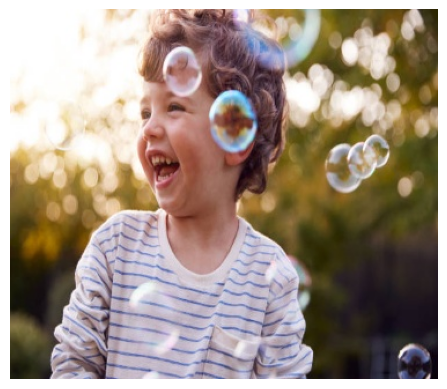

1/1 [==============================] - 0s 31ms/step
[[9.999999e-01 7.762901e-08]]
0


In [19]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()

input_image_resized = cv2.resize(input_image, (256,256))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,256,256,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

## LEts try with MobileNet V2

In [25]:
splitfolders.ratio('/content/train', output="splitted_data", seed=22, ratio=(0.85, 0.15,0))

Copying files: 680 files [00:00, 1520.87 files/s]


In [26]:
train_gen=ImageDataGenerator(
    shear_range=0.4,
    width_shift_range=0.3,
    height_shift_range=0.3,
    rotation_range=40,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1.0/255.0,
)

scale_gen=ImageDataGenerator(
    rescale=1.0/255.0
)

In [27]:
train_batches=train_gen.flow_from_directory(
    "/content/splitted_data/train",
    class_mode="binary",
    batch_size=16,
    color_mode="rgb",
    target_size=(224,224),
)

Found 578 images belonging to 2 classes.


In [28]:
validation_batches=scale_gen.flow_from_directory(
    "/content/splitted_data/val",
    class_mode="binary",
    batch_size=16,
    color_mode="rgb",
    target_size=(224,224),
)

Found 102 images belonging to 2 classes.


In [29]:
test_batches=scale_gen.flow_from_directory(
    "/content/splitted_data/test",
    class_mode="binary",
    batch_size=16,
    color_mode="rgb",
    target_size=(224,224),
)

Found 0 images belonging to 2 classes.


In [30]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [33]:
inputs=Input(shape=(224,224,3))
pretrained_model=MobileNetV2(include_top=False)

for layer in pretrained_model.layers:
    layer.trainable=False

model_outputs=pretrained_model(inputs)

globpooling=GlobalAveragePooling2D()(model_outputs)

fc_1=Dense(128,activation="relu")(globpooling)

fc_2=Dense(128,activation="relu")(fc_1)

main_outputs=Dense(1,activation="sigmoid")(fc_2)

model=Model(inputs,main_outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, None, None, 1280   2257984   
 tional)                     )                                   
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 128)               163968    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129   

In [34]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss=BinaryCrossentropy(),metrics=[BinaryAccuracy()])

In [36]:
history = model.fit(
    train_batches,
    epochs=10,
    validation_data=validation_batches
)

Epoch 1/10
37/37 [==============================] - 9s 227ms/step - loss: 0.4593 - binary_accuracy: 0.7855 - val_loss: 0.4277 - val_binary_accuracy: 0.7745
Epoch 2/10
37/37 [==============================] - 9s 233ms/step - loss: 0.4665 - binary_accuracy: 0.7734 - val_loss: 0.4114 - val_binary_accuracy: 0.7941
Epoch 3/10
37/37 [==============================] - 9s 244ms/step - loss: 0.4297 - binary_accuracy: 0.8235 - val_loss: 0.4097 - val_binary_accuracy: 0.8235
Epoch 4/10
37/37 [==============================] - 9s 251ms/step - loss: 0.4621 - binary_accuracy: 0.8062 - val_loss: 0.4104 - val_binary_accuracy: 0.8137
Epoch 5/10
37/37 [==============================] - 7s 201ms/step - loss: 0.4316 - binary_accuracy: 0.8080 - val_loss: 0.3856 - val_binary_accuracy: 0.8039
Epoch 6/10
37/37 [==============================] - 8s 212ms/step - loss: 0.4151 - binary_accuracy: 0.8166 - val_loss: 0.3974 - val_binary_accuracy: 0.8235
Epoch 7/10
37/37 [==============================] - 9s 243ms/ste

Path of the image to be predicted: /content/test/adults/38.jpg


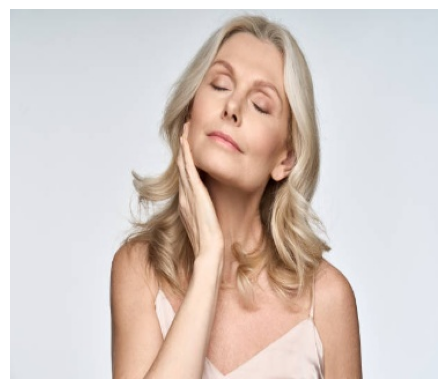

1/1 [==============================] - 0s 22ms/step
Adult


In [55]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()

input_image_resized = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(input_image_reshaped)
# print(input_prediction)
# input_pred_label = np.argmax(input_prediction)
# print(input_pred_label)
if(input_prediction < 0.5):
  print("Adult")
else:
  print("Child")


In [56]:
model_loss, model_acc = model.evaluate(train_batches)
print("Model has a loss of %.2f and accuracy %.2f%%" % (model_loss, model_acc*100))

37/37 [==============================] - 8s 219ms/step - loss: 0.4151 - binary_accuracy: 0.8028
Model has a loss of 0.42 and accuracy 80.28%


In [57]:
model_loss, model_acc = model.evaluate(validation_batches)
print("Model has a loss of %.2f and accuracy %.2f%%" % (model_loss, model_acc*100))

7/7 [==============================] - 1s 85ms/step - loss: 0.4102 - binary_accuracy: 0.8235
Model has a loss of 0.41 and accuracy 82.35%


In [59]:
model.save('Children_vs_Adults_Classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
